In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import math
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [2]:
train=pd.read_csv('train.csv')
train_index=train.index
train.head(20)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


In [3]:
test=pd.read_csv('test.csv')
test['is_promoted']=0
dataset=train.append(test)

In [4]:
train.shape

(54808, 14)

In [5]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [6]:
train.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

In [7]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


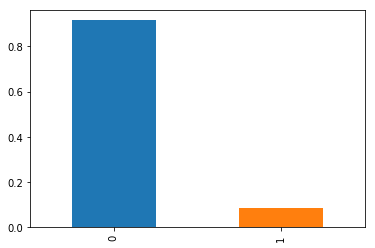

In [8]:
(train['is_promoted'].value_counts()/train.shape[0]).plot.bar()

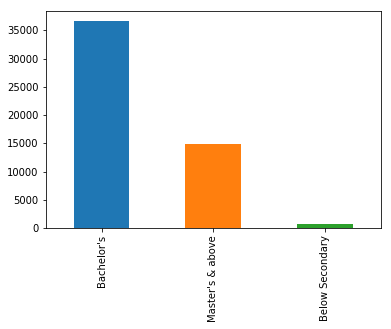

In [9]:
train['education'].value_counts().plot.bar()

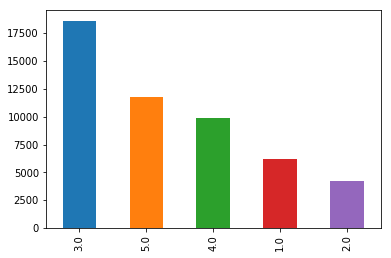

In [10]:
train['previous_year_rating'].value_counts().plot.bar()

In [11]:
train[train['avg_training_score'] > 85]['avg_training_score'].value_counts().sum()

3076

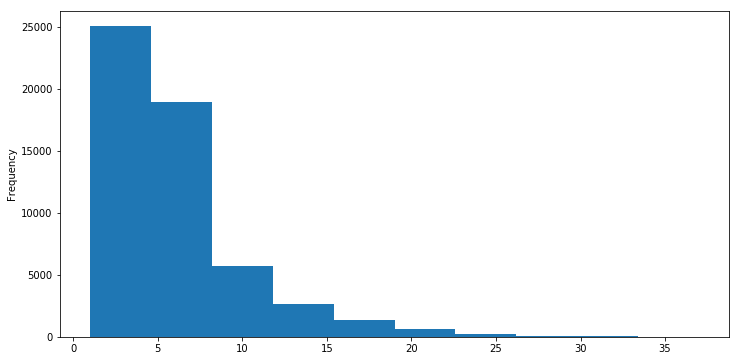

In [12]:
train['length_of_service'].plot.hist(figsize=(12,6))

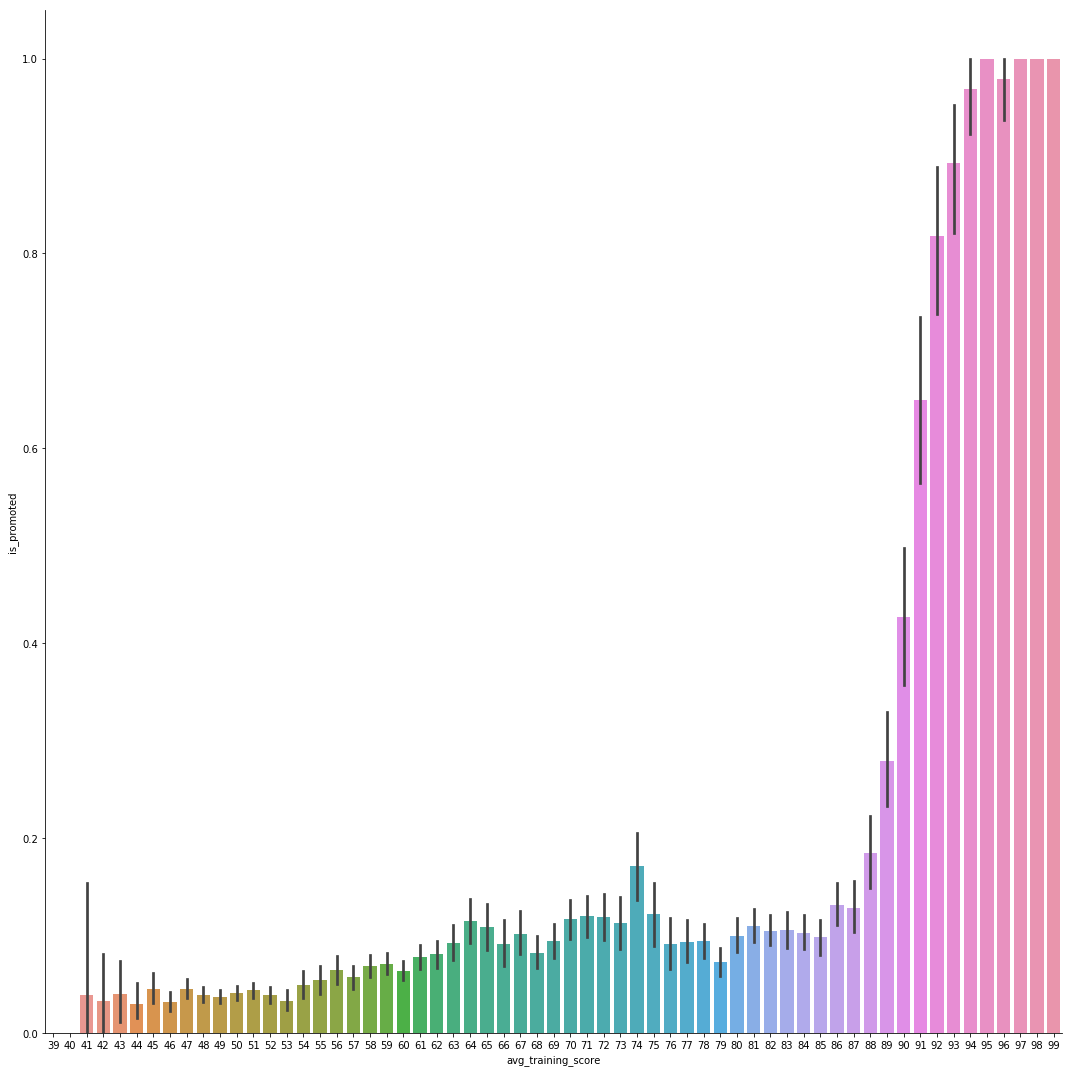

In [13]:
g = sns.factorplot(x='avg_training_score', y='is_promoted', data=train, kind='bar', size = 15)

In [14]:
dataset['new_joinee']=dataset['previous_year_rating'].apply(lambda x:1 if math.isnan(x) == True else 0)

In [15]:
dataset['previous_year_rating'].fillna(dataset['previous_year_rating'].mean(), inplace=True)

In [16]:
dataset['overall_score']=dataset['avg_training_score'] * dataset['no_of_trainings']

In [17]:
dataset['education'] = dataset['education'].map({'Master\'s & above': 1, 'Bachelor\'s':2, 'Below Secondary' : 3})
dataset['education'].fillna(int(2), inplace=True)
dataset.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,new_joinee,overall_score
0,65438,Sales & Marketing,region_7,1.0,f,sourcing,1,35,5.0,8,1,0,49,0,0,49
1,65141,Operations,region_22,2.0,m,other,1,30,5.0,4,0,0,60,0,0,60
2,7513,Sales & Marketing,region_19,2.0,m,sourcing,1,34,3.0,7,0,0,50,0,0,50
3,2542,Sales & Marketing,region_23,2.0,m,other,2,39,1.0,10,0,0,50,0,0,100
4,48945,Technology,region_26,2.0,m,other,1,45,3.0,2,0,0,73,0,0,73


In [18]:
dummy_region=pd.get_dummies(dataset['region'])
dataset=pd.concat([dataset, dummy_region], axis=1)

In [19]:
dummy_department=pd.get_dummies(dataset['department'])
dataset=pd.concat([dataset, dummy_department], axis=1)

In [20]:
dummy_channel=pd.get_dummies(dataset['recruitment_channel'])
dataset=pd.concat([dataset, dummy_channel], axis=1)

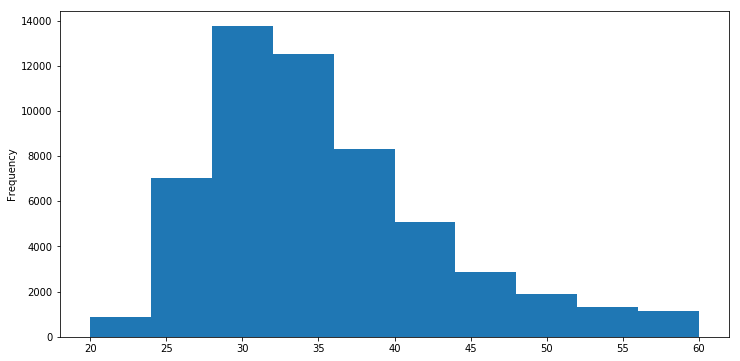

In [21]:
train['age'].plot.hist(figsize=(12,6))

In [22]:
dataset['gender']=dataset['gender'].apply(lambda x: 1 if x == 'm' else 0)

In [23]:
train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [24]:
dataset.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,other,referred,sourcing
0,65438,Sales & Marketing,region_7,1.0,0,sourcing,1,35,5.0,8,...,0,0,0,0,0,1,0,0,0,1
1,65141,Operations,region_22,2.0,1,other,1,30,5.0,4,...,0,0,1,0,0,0,0,1,0,0
2,7513,Sales & Marketing,region_19,2.0,1,sourcing,1,34,3.0,7,...,0,0,0,0,0,1,0,0,0,1
3,2542,Sales & Marketing,region_23,2.0,1,other,2,39,1.0,10,...,0,0,0,0,0,1,0,1,0,0
4,48945,Technology,region_26,2.0,1,other,1,45,3.0,2,...,0,0,0,0,0,0,1,1,0,0


In [25]:
X=dataset.drop(['department', 'region', 'recruitment_channel', 'employee_id', 'is_promoted'], axis=1).values[:len(train_index),:]
y=dataset['is_promoted'].values[:len(train_index)]

In [26]:
import lightgbm as lgbm
lgbmc=lgbm.LGBMClassifier(objective='binary', n_estimators=80, colsample_bytree=0.8)

In [27]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=0)
rfe = RFE(lgbmc, 49)  

In [28]:
rfe.fit(X_train,y_train)

RFE(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.8,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=80,
        n_jobs=-1, num_leaves=31, objective='binary', random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1),
  n_features_to_select=49, step=1, verbose=0)

In [29]:
X_test_final=dataset.drop(['is_promoted', 'department', 'region', 'recruitment_channel', 'employee_id'], axis=1).values[len(train_index):,:]
Submission = pd.DataFrame({ 'employee_id': test['employee_id'],
                            'is_promoted':(rfe.predict_proba(X_test_final)[:,1:]).ravel()})
Submission.to_csv("LGBM_Submission.csv", index=False)

In [30]:
Submission['is_promoted'].value_counts()

0.000647    247
0.001002    203
0.001014    154
0.000558    102
0.000864     78
0.000861     60
0.001182     58
0.001174     57
0.001070     53
0.001012     51
0.000880     48
0.000984     39
0.139691     39
0.000832     38
0.000823     31
0.000536     28
0.001068     28
0.000954     24
0.118634     23
0.000743     23
0.000973     22
0.000558     21
0.000970     20
0.000838     20
0.000874     20
0.001188     20
0.000778     20
0.000962     19
0.001205     19
0.000797     19
           ... 
0.002325      1
0.119123      1
0.001391      1
0.001319      1
0.264590      1
0.024826      1
0.001983      1
0.100370      1
0.065517      1
0.006474      1
0.638072      1
0.908640      1
0.166598      1
0.002386      1
0.012235      1
0.081673      1
0.001020      1
0.008064      1
0.065157      1
0.990889      1
0.075743      1
0.117610      1
0.000715      1
0.132488      1
0.004624      1
0.001106      1
0.002106      1
0.120209      1
0.002238      1
0.138095      1
Name: is_promoted, Lengt